# Ненадгледано учење - оцена дестинација

## Додатне библиотеке

Библиотеке које су коришћене у оквиру овог пројекта су следеће:

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, estimate_bandwidth, MeanShift
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors as mcolors
import math
from matplotlib import cm

## Изглед скупа података

Скуп се састоји од оцена које су корисници дали одређеним локацијама у градовима широм Европе. Скуп се састоји од 24 категорија које представљају просечну оцену ресторана, млекара, пекара, паркова, видиковаца...

In [2]:
data = pd.read_csv('data.csv')
data

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


## Пречишћавање података

У оквиру самог скупа података, откривено је да постоје неке невалидне вредности, стога је било потребно те вредности заменити неким валидним вредностима или ту врсту уклонити из скупа података. У нашем случају, невалидне вредности су замењене средњом вредношћу колоне у којој се та невалидна вредност налази. Такође је потребно избацити и јединствени идентификатор корисника, с обзиром да не утиче на сам процес кластеризације.

In [4]:
def nevalidne_vrednosti(data):
    data_new = data.drop('User', axis=1)
    average = data_new.mean(axis=1)
    average = np.array(average)
    sample = np.repeat('2\t2.', len(average))
    sample1 = np.repeat(np.nan, len(average))
    data_new = data_new.replace(sample1, average)
    data_new = data_new.replace(sample, average)

    return data_new


def nevalidne_vrednosti1(data):
    data_new = data.drop('User', axis=1)
    average = data_new.mean(axis=1)
    average = np.array(average)
    sample1 = np.repeat(np.nan, len(average))
    data_new = data_new.replace(sample1, average)

    return data_new


## Кластеризација над целим скупом података

Сваки од алгоритама, као и мере које служе за процену квалитета кластеризовања, имплементирани су у оквиру посебне скрипте.

In [8]:
def k_means(data, n_clusters=250):
    kmeans = KMeans(n_clusters=n_clusters).fit(data)
    y_predicted = kmeans.predict(data)

    print("KMeans algorithm")
    print('Estimated number of clusters: %d' % n_clusters)
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, y_predicted))
    print('Calinski-Harabasz Index: %.3f' % metrics.calinski_harabasz_score(data, y_predicted))
    print('Davies-Bouldin Index: %0.3f' % metrics.davies_bouldin_score(data, y_predicted))
    print()
    # vz.generate_heatmap(data)
    # vz.correlation_3D(data)


def dbscan(data, epsilon=3, min_samples=12, metric='l2'):
    db = DBSCAN(eps=epsilon, min_samples=min_samples, metric=metric).fit(data)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    print("DBSCAN algorithm")
    print('Estimated number of clusters: %d' % n_clusters)
    print('Estimated number of noise points: %d' % n_noise)
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, labels))
    print('Calinski-Harabasz Index: %.3f' % metrics.calinski_harabasz_score(data, labels))
    print('Davies-Bouldin Index: %0.3f' % metrics.davies_bouldin_score(data, labels))
    print()


def birch(data, threshold=0.2, n_clusters=250):
    birch_model = Birch(threshold=threshold, n_clusters=n_clusters)
    birch_model.fit(data)

    labelsBirch = birch_model.labels_
    n_clusters = len(set(labelsBirch)) - (1 if -1 in labelsBirch else 0)

    print("Birch algorithm")
    print('Estimated number of clusters: %d' % n_clusters)
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, labelsBirch))
    print('Calinski-Harabasz Index: %.3f' % metrics.calinski_harabasz_score(data, labelsBirch))
    print('Davies-Bouldin Index: %0.3f' % metrics.davies_bouldin_score(data, labelsBirch))
    print()


def mean_shift(data, quantile=0.01, n_samples=500):
    bandwidth = estimate_bandwidth(data, quantile=quantile, n_samples=n_samples)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labelsMeanSift = ms.labels_

    labels_unique = np.unique(labelsMeanSift)
    n_clusters = len(labels_unique)

    print("Mean shift algorithm")
    print('Estimated number of clusters: %d' % n_clusters)
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, labelsMeanSift))
    print('Calinski-Harabasz Index: %.3f' % metrics.calinski_harabasz_score(data, labelsMeanSift))
    print('Davies-Bouldin Index: %0.3f' % metrics.davies_bouldin_score(data, labelsMeanSift))
    print()


def hierarchy(data, n_clusters=250):
    model = AgglomerativeClustering(distance_threshold=None, n_clusters=n_clusters)
    labelsHierarchy = model.fit(data).labels_

    print("Hierarchy clustering algorithm")
    print('Estimated number of clusters: %d' % n_clusters)
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, labelsHierarchy))
    print('Calinski-Harabasz Index: %.3f' % metrics.calinski_harabasz_score(data, labelsHierarchy))
    print('Davies-Bouldin Index: %0.3f' % metrics.davies_bouldin_score(data, labelsHierarchy))
    print()

### Резултати кластеризовања над целим скупом података

In [10]:
data = pd.read_csv('data.csv')
data = nevalidne_vrednosti(data)

k_means(data, 250)
dbscan(data, 3, 12, 'l2')
birch(data, 0.2, 250)
mean_shift(data, 0.02, 250)
hierarchy(data, 250)

KMeans algorithm
Estimated number of clusters: 250
Silhouette Coefficient: 0.281
Calinski-Harabasz Index: 126.948
Davies-Bouldin Index: 1.345

DBSCAN algorithm
Estimated number of clusters: 43
Estimated number of noise points: 1798
Silhouette Coefficient: -0.129
Calinski-Harabasz Index: 50.819
Davies-Bouldin Index: 1.626

Birch algorithm
Estimated number of clusters: 250
Silhouette Coefficient: 0.289
Calinski-Harabasz Index: 124.619
Davies-Bouldin Index: 1.330

Mean shift algorithm
Estimated number of clusters: 5
Silhouette Coefficient: 0.095
Calinski-Harabasz Index: 362.971
Davies-Bouldin Index: 2.115

Hierarchy clustering algorithm
Estimated number of clusters: 250
Silhouette Coefficient: 0.294
Calinski-Harabasz Index: 126.462
Davies-Bouldin Index: 1.320



Добијени резултати над целим скупом података показују да су над овим скупом података, најидеалнији алгоритми за кластеризацију, *kmeans*, *birch* и хијерхијско кластеровање.

## Смањење димензионалности скупа података

Са циљем побољшања перформанси и резултата кластеризације, покушано је са смањењем димензионалности скупа података на два начина.

### Смањење димензионалности коришћењем *PCA* анализе 

In [12]:
data1 = pd.read_csv('data.csv')
data1 = nevalidne_vrednosti(data1)
pca = PCA(8)
pca.fit(data1)

pca_data = pca.transform(data1)

pca_data

array([[-1.05311203, -2.55362237, -2.17343865, ..., -1.99248774,
        -2.2865841 , -0.69877188],
       [-1.10415785, -2.62139608, -2.11886844, ..., -1.97811195,
        -2.2232664 , -0.66897847],
       [-1.10620409, -2.61444856, -2.11824976, ..., -1.98191317,
        -2.22125316, -0.66724585],
       ...,
       [ 5.92782013,  1.47779094, -0.16713272, ...,  1.45155121,
         1.47400743, -2.31538598],
       [ 4.72406659,  2.88233369, -0.77456554, ...,  0.87564787,
         0.77786797, -1.63520318],
       [ 5.90378948,  1.23706785, -0.30743071, ...,  0.86334866,
         1.34722366, -2.32088021]])

In [13]:
k_means(pca_data, 250)
dbscan(pca_data, 3, 12, 'l2')
birch(pca_data, 0.2, 250)
mean_shift(pca_data, 0.01, 500)
hierarchy(pca_data, 250)

KMeans algorithm
Estimated number of clusters: 250
Silhouette Coefficient: 0.294
Calinski-Harabasz Index: 330.140
Davies-Bouldin Index: 1.218

DBSCAN algorithm
Estimated number of clusters: 1
Estimated number of noise points: 8
Silhouette Coefficient: 0.162
Calinski-Harabasz Index: 4.122
Davies-Bouldin Index: 2.897

Birch algorithm
Estimated number of clusters: 250
Silhouette Coefficient: 0.295
Calinski-Harabasz Index: 317.894
Davies-Bouldin Index: 1.195

Mean shift algorithm
Estimated number of clusters: 154
Silhouette Coefficient: 0.245
Calinski-Harabasz Index: 265.725
Davies-Bouldin Index: 1.116

Hierarchy clustering algorithm
Estimated number of clusters: 250
Silhouette Coefficient: 0.302
Calinski-Harabasz Index: 328.489
Davies-Bouldin Index: 1.167



Након смањења димензионалности коришћењем *PCA* анализе, примећено је да се добијају бољи резултати кластеровања, на основу приложених метрика, у односу на резултате над целим скупом података. Мана овог метода је та што се губи информацијска добит. За најбоље алгоритме се добијају исти као у претходном случају. Треба напоменути и то да је побољшано кластеровање *mean shift* алгоритмом у односу на претходни случај.

### Смањење димензионалности коришћењем корелације

Функције које служе за графички приказ корелације између атрибута имплементиране су у оквиру посебне скрипте.

In [14]:
def generate_heatmap(data):
    sns.heatmap(data.corr(), annot=True)
    plt.show()


def correlation_3D(data):
    df = data.corr()
    df.index = range(0, len(df))
    df.rename(columns=dict(zip(df.columns, df.index)), inplace=True)
    df = df.astype(object)

    for i in range(0, len(df)):
        for j in range(0, len(df)):
            if i != j:
                df.iloc[i, j] = (i, j, df.iloc[i, j])
            else:
                df.iloc[i, j] = (i, j, 0)

    df_list = []

    for sub_list in df.values:
        df_list.extend(sub_list)

    plot_df = pd.DataFrame(df_list)

    fig = plt.figure()
    ax = Axes3D(fig)

    ax.plot_trisurf(plot_df[0], plot_df[1], plot_df[2], cmap=cm.jet, linewidth=0.2)

    plt.show()

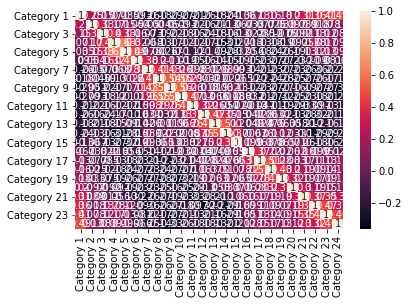

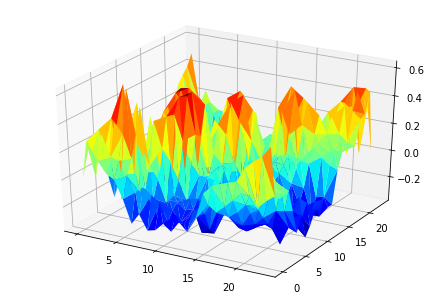

In [15]:
generate_heatmap(data)
correlation_3D(data)

На основу графичког приказа, и анализе корелисаности атрибута, одлучено је да се скуп података сведе на 8 атрибута, и то на оне који највише корелише. 

In [16]:
data = pd.read_csv('data1.csv')
data

,User,Category 1,Category 7,Category 8,Category 9,Category 10,Category 14,Category 21,Category 22
0,User 1,0.00,5.00,2.35,2.33,2.64,1.72,0.00,0.0
1,User 2,0.00,5.00,2.64,2.33,2.65,1.72,0.00,0.0
2,User 3,0.00,5.00,2.64,2.33,2.64,1.72,0.00,0.0
3,User 4,0.00,5.00,2.35,2.33,2.64,1.72,0.00,0.0
4,User 5,0.00,5.00,2.64,2.33,2.64,1.72,0.00,0.0
...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,2.43,1.09,1.77,1.04,1.29,1.05,5.0
5452,User 5453,0.93,1.77,1.07,1.76,1.02,1.27,1.06,5.0
5453,User 5454,0.94,1.75,1.05,1.75,1.00,1.25,1.07,5.0
5454,User 5455,0.95,1.76,1.03,1.74,0.98,1.23,1.08,5.0


In [17]:
data = nevalidne_vrednosti1(data)
k_means(data, 250)
dbscan(data, 3, 12, 'l2')
birch(data, 0.2, 250)
mean_shift(data, 0.01, 500)
hierarchy(data, 250)

KMeans algorithm
Estimated number of clusters: 250
Silhouette Coefficient: 0.483
Calinski-Harabasz Index: 1102.791
Davies-Bouldin Index: 0.797

DBSCAN algorithm
Estimated number of clusters: 3
Estimated number of noise points: 15
Silhouette Coefficient: 0.235
Calinski-Harabasz Index: 46.224
Davies-Bouldin Index: 1.224

Birch algorithm
Estimated number of clusters: 250
Silhouette Coefficient: 0.454
Calinski-Harabasz Index: 951.237
Davies-Bouldin Index: 0.774

Mean shift algorithm
Estimated number of clusters: 252
Silhouette Coefficient: 0.407
Calinski-Harabasz Index: 510.220
Davies-Bouldin Index: 0.613

Hierarchy clustering algorithm
Estimated number of clusters: 250
Silhouette Coefficient: 0.479
Calinski-Harabasz Index: 1151.460
Davies-Bouldin Index: 0.784



Након смањења димензионалности коришћењем корелације, примећено је да се добијају још бољи резултати кластеровања, на основу приложених метрика, у односу на резултате над целим скупом података и над скупом података који је добијен *PCA* анализом. Исти алгоритми се такође показују као најбољи. Треба напоменути и то да је побољшано кластеровање *mean shift* алгоритмом у односу на претходна два случаја.

## Карактеристике кластера над финалним скупом података

In [18]:
def join_clusters(data, lk, ldb, lb, lms):
    lk = pd.DataFrame(lk, columns=["KMeans"])
    df = data.join(lk)
    ldb = pd.DataFrame(ldb, columns=["DBScan"])
    df = df.join(ldb)
    lb = pd.DataFrame(lb, columns=["Birch"])
    df = df.join(lb)
    lms = pd.DataFrame(lms, columns=["Mean Shift"])
    df = df.join(lms)

    df.to_csv('clusters.csv')

In [19]:
data = pd.read_csv('clusters.csv')
data

,Unnamed: 0,Category 1,Category 7,Category 8,Category 9,Category 10,Category 14,Category 21,Category 22,KMeans,DBScan,Birch,Mean Shift
0,0,0.00,5.00,2.35,2.33,2.64,1.72,0.00,0.0,149,0,135,72
1,1,0.00,5.00,2.64,2.33,2.65,1.72,0.00,0.0,149,0,135,72
2,2,0.00,5.00,2.64,2.33,2.64,1.72,0.00,0.0,149,0,135,72
3,3,0.00,5.00,2.35,2.33,2.64,1.72,0.00,0.0,149,0,135,72
4,4,0.00,5.00,2.64,2.33,2.64,1.72,0.00,0.0,149,0,135,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,5451,0.91,2.43,1.09,1.77,1.04,1.29,1.05,5.0,176,0,45,44
5452,5452,0.93,1.77,1.07,1.76,1.02,1.27,1.06,5.0,176,0,45,44
5453,5453,0.94,1.75,1.05,1.75,1.00,1.25,1.07,5.0,176,0,45,44
5454,5454,0.95,1.76,1.03,1.74,0.98,1.23,1.08,5.0,176,0,45,44


### Границе атрибута у кластерима

#### *KMeans* алгоритам

In [20]:
data = pd.read_csv('KMeans.csv')
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,240,241,242,243,244,245,246,247,248,249
0,Category 1,"(0.86, 1.3)","(1.32, 1.56)","(1.33, 1.53)","(1.09, 1.83)","(2.65, 2.76)","(0.0, 0.55)","(2.19, 2.39)","(0.9, 1.7)","(2.08, 2.45)",...,"(2.08, 2.61)","(1.39, 2.05)","(1.8, 3.36)","(0.68, 0.78)","(0.76, 2.15)","(0.54, 0.54)","(1.36, 1.42)","(3.64, 3.69)","(0.92, 0.92)","(1.14, 1.32)"
1,Category 7,"(5.0, 5.0)","(1.7, 1.85)","(2.03, 3.24)","(5.0, 5.0)","(1.56, 2.53)","(1.43, 1.69)","(4.22, 4.29)","(4.54, 5.0)","(1.13, 1.45)",...,"(1.13, 1.28)","(3.08, 3.24)","(1.27, 1.93)","(1.35, 1.42)","(5.0, 5.0)","(4.78, 5.0)","(3.21, 3.26)","(1.61, 1.88)","(5.0, 5.0)","(1.65, 2.65)"
2,Category 8,"(2.71, 3.74)","(1.69, 1.83)","(4.34, 5.0)","(1.81, 2.61)","(1.25, 1.78)","(1.45, 1.55)","(2.15, 2.87)","(4.53, 5.0)","(1.14, 1.48)",...,"(1.18, 1.5)","(3.04, 3.23)","(1.28, 1.73)","(1.37, 1.43)","(1.14, 1.84)","(4.16, 4.25)","(5.0, 5.0)","(1.33, 1.34)","(2.95, 2.95)","(0.88, 1.69)"
3,Category 9,"(2.7, 3.29)","(1.7, 1.84)","(3.78, 4.53)","(2.47, 2.61)","(1.23, 1.8)","(2.61, 2.67)","(2.68, 3.48)","(5.0, 5.0)","(1.18, 1.64)",...,"(0.89, 1.58)","(3.05, 3.45)","(1.3, 3.54)","(5.0, 5.0)","(5.0, 5.0)","(5.0, 5.0)","(0.91, 0.97)","(1.32, 1.33)","(2.94, 2.94)","(0.85, 1.71)"
4,Category 10,"(2.51, 3.31)","(1.73, 2.89)","(3.78, 3.95)","(2.44, 2.61)","(1.21, 1.59)","(2.63, 3.27)","(2.7, 3.12)","(5.0, 5.0)","(1.29, 1.77)",...,"(1.13, 1.6)","(5.0, 5.0)","(0.86, 1.59)","(2.88, 2.97)","(1.09, 1.79)","(3.0, 5.0)","(5.0, 5.0)","(1.33, 1.43)","(2.56, 2.56)","(0.83, 1.7)"
5,Category 14,"(3.66, 3.89)","(1.22, 1.47)","(1.41, 1.63)","(1.51, 1.77)","(0.78, 1.64)","(5.0, 5.0)","(0.8, 1.01)","(0.87, 2.52)","(0.85, 1.21)",...,"(0.85, 0.95)","(0.84, 0.99)","(1.01, 1.85)","(1.65, 1.68)","(0.82, 1.95)","(1.74, 1.78)","(0.88, 1.06)","(0.78, 0.84)","(5.0, 5.0)","(0.86, 1.3)"
6,Category 21,"(0.0, 0.97)","(0.0, 0.6)","(0.0, 0.58)","(0.0, 0.67)","(0.73, 1.0)","(0.5, 0.56)","(0.84, 1.02)","(0.0, 1.58)","(2.27, 2.64)",...,"(3.64, 3.71)","(0.0, 0.68)","(2.13, 2.6)","(0.55, 0.62)","(0.72, 1.2)","(3.41, 3.41)","(0.0, 0.53)","(0.79, 0.79)","(5.0, 5.0)","(1.06, 1.35)"
7,Category 22,"(0.72, 1.08)","(4.38, 4.51)","(0.0, 0.73)","(0.52, 1.16)","(0.74, 0.93)","(0.0, 0.0)","(4.22, 4.28)","(0.89, 1.8)","(4.62, 5.0)",...,"(5.0, 5.0)","(2.06, 3.26)","(2.14, 2.59)","(0.53, 0.71)","(0.74, 1.18)","(0.0, 0.5)","(0.58, 1.46)","(5.0, 5.0)","(0.9, 0.9)","(1.07, 1.3)"


#### *DBScan* алгоритам

In [21]:
data = pd.read_csv('DBScan.csv')
data

,Unnamed: 0,0,1,2,3
0,Category 1,"(0.92, 1.34)","(0.0, 5.0)","(1.21, 2.1)","(1.21, 1.34)"
1,Category 7,"(2.24, 5.0)","(1.12, 5.0)","(2.36, 3.24)","(1.66, 2.84)"
2,Category 8,"(1.63, 2.95)","(0.86, 5.0)","(1.63, 2.92)","(1.62, 1.75)"
3,Category 9,"(0.89, 5.0)","(0.84, 5.0)","(3.6, 5.0)","(1.64, 1.75)"
4,Category 10,"(0.98, 5.0)","(0.81, 5.0)","(3.22, 5.0)","(4.93, 5.0)"
5,Category 14,"(0.81, 5.0)","(0.76, 5.0)","(0.81, 1.14)","(0.82, 1.09)"
6,Category 21,"(4.3, 5.0)","(0.0, 5.0)","(4.21, 5.0)","(4.7, 5.0)"
7,Category 22,"(0.9, 5.0)","(0.0, 5.0)","(4.22, 5.0)","(5.0, 5.0)"


#### *Birch* алгоритам

In [22]:
data = pd.read_csv('Birch.csv')
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,240,241,242,243,244,245,246,247,248,249
0,Category 1,"(0.5, 1.41)","(2.08, 2.65)","(1.21, 1.33)","(1.0, 1.14)","(0.75, 1.83)","(2.68, 4.86)","(0.52, 0.98)","(0.5, 1.65)","(1.71, 2.64)",...,"(5.0, 5.0)","(1.39, 2.05)","(1.35, 1.35)","(1.55, 2.58)","(1.17, 1.51)","(1.06, 1.06)","(0.53, 1.12)","(1.3, 1.3)","(0.75, 1.19)","(1.96, 2.05)"
1,Category 7,"(2.6, 3.3)","(1.13, 1.47)","(2.36, 2.96)","(1.85, 1.93)","(5.0, 5.0)","(2.36, 2.51)","(1.48, 1.9)","(4.77, 5.0)","(1.14, 1.28)",...,"(5.0, 5.0)","(3.08, 3.24)","(5.0, 5.0)","(2.88, 3.27)","(2.16, 2.22)","(5.0, 5.0)","(5.0, 5.0)","(2.41, 2.41)","(2.23, 2.66)","(3.0, 3.2)"
2,Category 8,"(2.63, 3.29)","(1.17, 1.5)","(1.66, 2.86)","(2.59, 3.09)","(1.75, 2.2)","(0.97, 1.77)","(1.47, 2.06)","(3.23, 4.77)","(0.88, 1.47)",...,"(2.08, 2.1)","(3.04, 3.23)","(1.81, 1.81)","(2.78, 3.12)","(3.85, 3.85)","(5.0, 5.0)","(1.5, 1.77)","(1.68, 1.68)","(1.13, 2.1)","(2.99, 3.0)"
3,Category 9,"(5.0, 5.0)","(0.89, 1.63)","(0.88, 2.61)","(1.76, 2.68)","(2.47, 3.1)","(4.85, 5.0)","(1.46, 3.04)","(5.0, 5.0)","(1.09, 1.66)",...,"(3.69, 3.7)","(3.05, 3.39)","(5.0, 5.0)","(2.78, 3.58)","(5.0, 5.0)","(1.81, 1.81)","(2.3, 3.18)","(0.89, 0.89)","(1.27, 2.22)","(4.16, 5.0)"
4,Category 10,"(5.0, 5.0)","(1.13, 1.66)","(1.49, 2.44)","(3.87, 5.0)","(2.44, 3.08)","(0.92, 1.28)","(1.45, 3.32)","(4.4, 5.0)","(0.83, 1.68)",...,"(5.0, 5.0)","(5.0, 5.0)","(5.0, 5.0)","(2.79, 3.58)","(5.0, 5.0)","(5.0, 5.0)","(2.48, 3.16)","(4.96, 4.96)","(0.98, 1.88)","(5.0, 5.0)"
5,Category 14,"(0.82, 1.14)","(0.78, 1.16)","(0.78, 0.91)","(1.73, 1.92)","(1.09, 1.77)","(1.2, 1.55)","(5.0, 5.0)","(1.19, 2.26)","(5.0, 5.0)",...,"(5.0, 5.0)","(0.84, 0.89)","(1.44, 1.44)","(0.76, 1.19)","(3.86, 5.0)","(1.74, 1.74)","(5.0, 5.0)","(0.86, 0.86)","(1.17, 1.63)","(5.0, 5.0)"
6,Category 21,"(0.0, 0.54)","(3.64, 5.0)","(0.57, 0.79)","(0.5, 1.11)","(0.0, 0.82)","(0.88, 1.14)","(0.53, 0.97)","(0.0, 1.45)","(0.87, 2.65)",...,"(0.0, 0.77)","(0.0, 0.68)","(0.51, 0.51)","(0.59, 0.88)","(0.73, 0.73)","(0.0, 0.0)","(0.53, 1.23)","(5.0, 5.0)","(0.76, 1.11)","(0.7, 0.71)"
7,Category 22,"(0.0, 0.87)","(4.13, 5.0)","(4.7, 5.0)","(0.94, 1.1)","(0.51, 1.58)","(0.86, 1.22)","(0.51, 0.95)","(0.0, 1.24)","(5.0, 5.0)",...,"(0.96, 0.97)","(2.97, 3.26)","(5.0, 5.0)","(5.0, 5.0)","(0.85, 0.85)","(5.0, 5.0)","(0.51, 1.11)","(1.17, 1.17)","(0.74, 1.13)","(5.0, 5.0)"


#### *Mean Shift* алгоритам

In [24]:
data = pd.read_csv('Mean Shift.csv')
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,242,243,244,245,246,247,248,249,250,251
0,Category 1,"(0.5, 1.8)","(0.6, 2.73)","(0.53, 1.96)","(0.59, 2.05)","(1.01, 2.96)","(0.83, 2.43)","(0.0, 0.68)","(0.66, 2.28)","(0.56, 1.65)",...,"(0.75, 0.75)","(0.62, 0.73)","(0.68, 0.68)","(0.65, 0.65)","(0.64, 0.64)","(0.54, 0.54)","(0.54, 0.54)","(0.54, 0.83)","(0.0, 0.0)","(0.0, 0.0)"
1,Category 7,"(4.54, 5.0)","(1.3, 2.45)","(5.0, 5.0)","(4.11, 5.0)","(1.8, 2.49)","(2.36, 4.22)","(1.42, 1.78)","(1.55, 2.06)","(1.54, 3.4)",...,"(3.79, 3.79)","(2.94, 5.0)","(1.47, 1.47)","(4.77, 4.77)","(1.29, 1.29)","(5.0, 5.0)","(4.78, 4.78)","(4.78, 5.0)","(5.0, 5.0)","(1.5, 1.5)"
2,Category 8,"(3.33, 5.0)","(1.28, 1.83)","(1.5, 3.28)","(1.75, 3.45)","(1.48, 2.67)","(2.17, 3.29)","(1.45, 1.61)","(1.54, 2.99)","(0.89, 2.6)",...,"(5.0, 5.0)","(2.95, 3.67)","(4.17, 4.17)","(1.33, 1.33)","(1.32, 1.32)","(4.25, 4.25)","(4.16, 4.16)","(3.37, 4.16)","(2.32, 2.32)","(2.67, 2.67)"
3,Category 9,"(5.0, 5.0)","(1.3, 1.85)","(2.0, 3.71)","(1.74, 3.42)","(1.46, 2.66)","(2.49, 3.59)","(2.53, 2.73)","(2.22, 3.04)","(0.86, 2.95)",...,"(1.58, 1.58)","(2.51, 2.87)","(5.0, 5.0)","(5.0, 5.0)","(5.0, 5.0)","(5.0, 5.0)","(5.0, 5.0)","(2.81, 2.93)","(2.3, 2.3)","(2.69, 2.69)"
4,Category 10,"(5.0, 5.0)","(1.34, 2.89)","(2.08, 3.27)","(1.6, 3.89)","(1.44, 2.79)","(1.76, 3.71)","(2.56, 3.34)","(2.14, 3.09)","(0.84, 2.72)",...,"(1.54, 1.54)","(1.56, 2.13)","(5.0, 5.0)","(2.98, 2.98)","(5.0, 5.0)","(3.0, 3.0)","(5.0, 5.0)","(2.82, 2.91)","(5.0, 5.0)","(3.29, 3.29)"
5,Category 14,"(0.86, 2.52)","(0.77, 1.47)","(5.0, 5.0)","(0.78, 2.73)","(1.49, 3.0)","(0.78, 1.35)","(5.0, 5.0)","(3.28, 5.0)","(0.77, 1.99)",...,"(5.0, 5.0)","(1.39, 1.48)","(1.52, 1.52)","(1.77, 1.77)","(5.0, 5.0)","(1.74, 1.74)","(1.78, 1.78)","(1.16, 2.4)","(1.27, 1.27)","(0.88, 0.88)"
6,Category 21,"(0.0, 1.58)","(0.0, 0.87)","(0.0, 1.65)","(0.0, 1.66)","(0.0, 1.72)","(0.0, 1.04)","(0.0, 0.66)","(0.6, 1.54)","(0.5, 1.36)",...,"(0.73, 0.73)","(5.0, 5.0)","(0.7, 0.7)","(3.42, 3.42)","(3.33, 3.33)","(3.41, 3.41)","(3.41, 3.41)","(0.52, 0.79)","(0.0, 0.0)","(0.0, 0.0)"
7,Category 22,"(0.0, 1.8)","(4.38, 5.0)","(0.51, 1.63)","(0.51, 2.05)","(0.66, 2.23)","(0.0, 1.07)","(0.0, 0.66)","(0.65, 1.69)","(0.52, 1.36)",...,"(0.71, 0.71)","(0.58, 0.66)","(0.67, 0.67)","(0.51, 0.51)","(0.51, 0.51)","(0.5, 0.5)","(0.0, 0.0)","(0.0, 0.78)","(0.0, 0.0)","(0.0, 0.0)"
